In [1]:
%matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import tdt

In [2]:
data_directory = r'/Users/vanessagutierrez/Desktop/practice_TDT/RVG02_B01'
stream = 'Wave'
stim_delay = 0.25 #sec

In [3]:
tdt_data = tdt.read_block(data_directory)
fs = tdt_data['streams'][stream]['fs']

read from t=0s to t=93.8s


In [8]:
tdt_data.streams

aud1	[struct]
mrk1	[struct]
aud2	[struct]
Wave	[struct]
Poly	[struct]

In [16]:
tdt_trials = tdt.epoc_filter(tdt_data, 'mark')
trial_list = tdt_trials['streams'][stream]['filtered']

In [9]:
chs = range(128)
tmax = 6000

In [10]:
# trial_mat = np.zeros((tmax, len(trial_list))) #rows, columns

In [11]:

# for tidx, trial in enumerate(trial_list):
#     sub_trial = trial[ch, :tmax]
#     trial_mat[:, tidx] = sub_trial 

In [12]:
# mean_trial = np.mean(trial_mat, axis = 1)

In [13]:
# plt.plot(mean_trial, linewidth= 2, c='k', zorder=10)

In [14]:
def plot_trials(trial_list, chs, tmax): 
# plot_trials(trial_list, chs, tmax, height = 8, width = 16)
    
#     f = plt.figure()

    for ch in chs:
        
        plt.subplot(8, 16, ch + 1)
#         plt.subplot(height, width, ch +1)
        
        for tidx, trial in enumerate(trial_list):
            sub_trial = trial[ch,:tmax]
            plt.plot(sub_trial, color=(.85,.85,.85), linewidth=0.5)
            ymin, ymax = np.min(sub_trial), np.max(sub_trial)
            plt.plot([stim_delay*fs, stim_delay*fs], [ymin, ymax], 'darksalmon')
        #     plt.plot([.3*fs, .3*fs], [ymin, ymax], 'darksalmon')
            plt.title('Channel ' + str(ch + 1), fontsize= 5)
            plt.xticks(fontsize=4)
            plt.yticks(fontsize=4)
#             plt.xlabel('Sample rate', fontsize= 10)
#             plt.ylabel('Volts', fontsize=10)
#             plt.tight_layout(pad=.1)

In [18]:
for tidx, trial in enumerate(trial_list):
    print(tidx, trial)

0 [[-1089 -1031 -1008 ...  -995 -1047 -1086]
 [ -413  -395  -403 ...    15     7    -7]
 [-1097 -1030 -1003 ...  -858  -915  -956]
 ...
 [ -886  -843  -765 ...  -963  -987  -993]
 [ -964  -917  -891 ... -1031 -1079 -1096]
 [-1121 -1068 -1043 ...  -973 -1030 -1040]]
1 [[-1091 -1111 -1147 ... -1168 -1218 -1260]
 [   -5    -3   -13 ...    68    55    44]
 [ -957  -972 -1014 ...  -986 -1037 -1086]
 ...
 [-1029 -1049 -1059 ...  -584  -638  -684]
 [-1104 -1121 -1150 ... -1176 -1227 -1246]
 [-1054 -1068 -1107 ... -1028 -1081 -1107]]
2 [[-1284 -1284 -1282 ... -1189 -1242 -1259]
 [   45    63    71 ...   184   168   174]
 [-1105 -1103 -1109 ... -1051 -1105 -1122]
 ...
 [ -713  -731  -746 ... -1313 -1353 -1355]
 [-1244 -1242 -1263 ... -1301 -1339 -1350]
 [-1118 -1121 -1149 ... -1286 -1331 -1346]]
3 [[-1259 -1308 -1321 ... -1501 -1509 -1539]
 [  188   159   167 ...   309   332   330]
 [-1127 -1178 -1183 ... -1334 -1341 -1368]
 ...
 [-1362 -1368 -1312 ... -1129 -1153 -1162]
 [-1366 -1381 -1349 ...

<IPython.core.display.Javascript object>


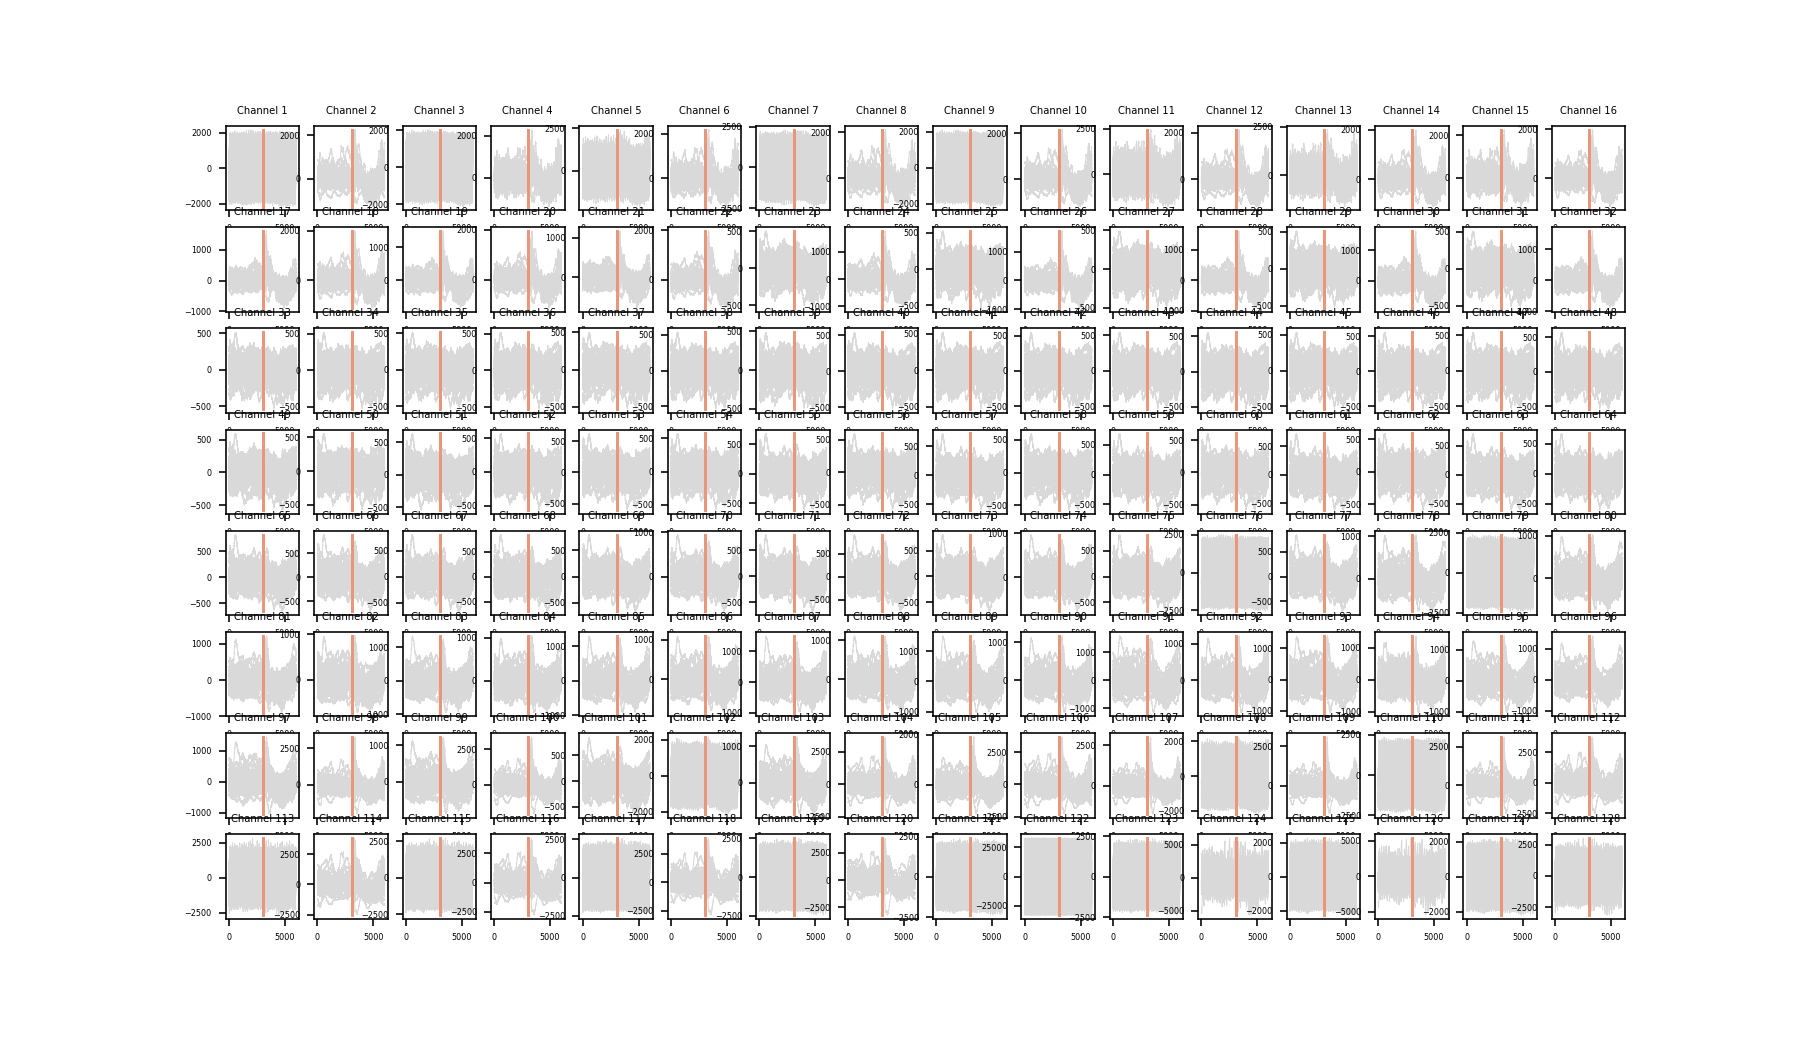

In [19]:
plot_trials(trial_list, chs, tmax)

In [106]:
def average_trial(trial_list, chs, tmax):
    
    trial_mat = np.zeros((tmax, len(trial_list)))
#     f = plt.figure()
    
    for ch in chs:
        
        plt.subplot(8, 16, ch + 1)
    
        for tidx, trial in enumerate(trial_list):
            sub_trial = trial[ch, :tmax]
            trial_mat[:, tidx] = sub_trial 
            
        mean_trial = np.mean(trial_mat, axis=1)
        std_trial = np.std(trial_mat, axis=1)
        plt.plot(mean_trial, color='k', linewidth=2, zorder=10)
#         plt.plot(mean_trial + std_trial, 'k--', mean_trial - std_trial, 'k--', linewidth=.8, zorder=10)
#         plt.rcParams['figure.figsize'] = [12, 3]
        plt.xticks(fontsize=4)
        plt.yticks(fontsize=4)

<IPython.core.display.Javascript object>


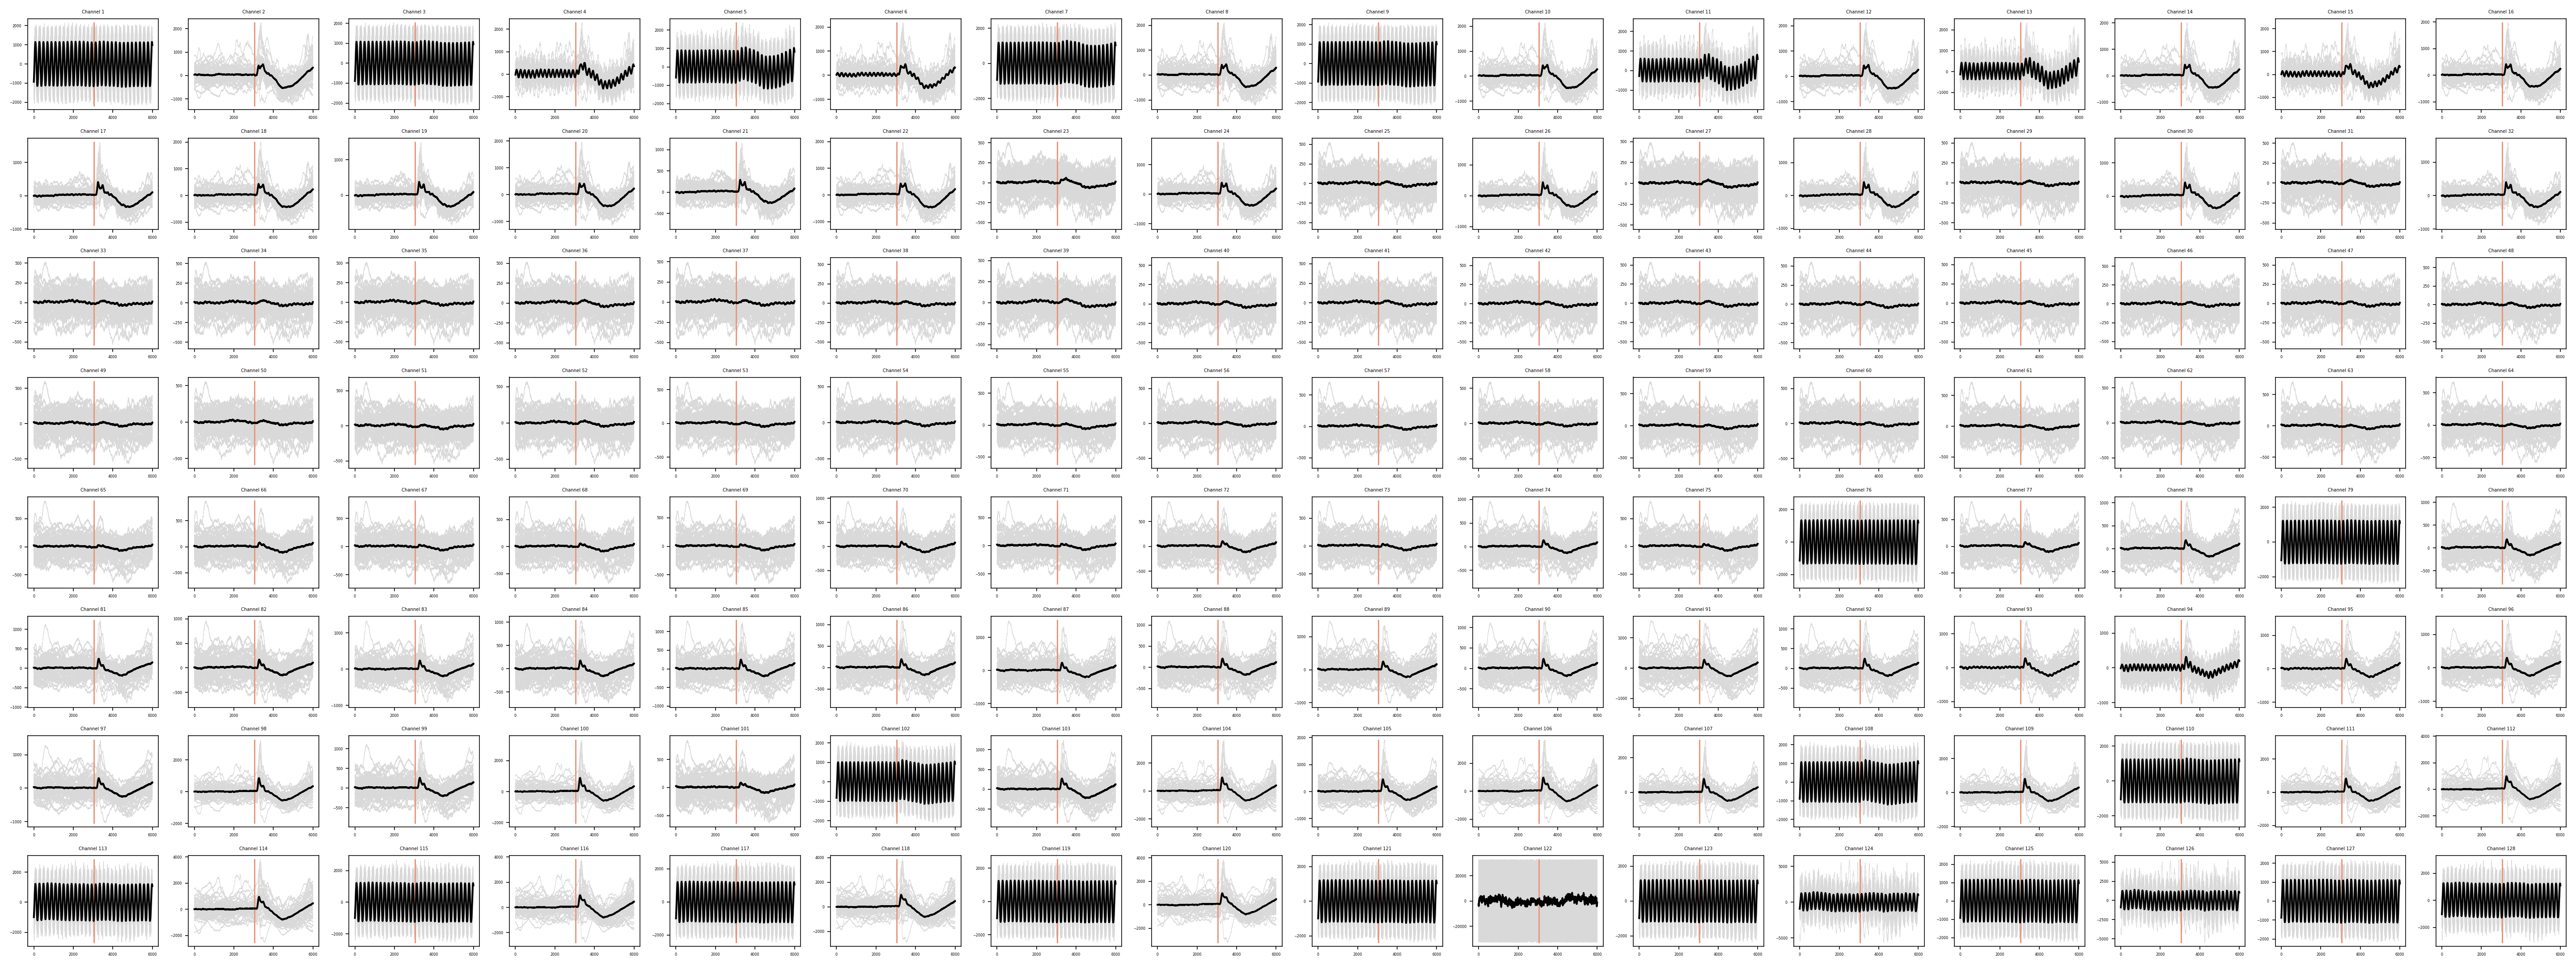

<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always b

<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always b

<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always b

<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always b

<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8, 16, ch + 1)
<ipython-input-106-dc9e247073aa>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always b

In [110]:
f = plt.figure()
plt.xticks(fontsize=4)
f.set_size_inches(40, 15)
plot_trials(trial_list, chs, tmax)
average_trial(trial_list, chs, tmax)
plt.tight_layout()
f.savefig("20trials.png")

In [ ]:
#     plt.suptitle('Trials Within Channels', fontsize=12)
#         plt.tight_layout(pad=.5)
#         plt.savefig('plot_trials.png')
#     plt.show() 